In [30]:
import matplotlib.pyplot as plt
import math

#wir kriegen die daten als p(phi) mit phi als Winkel der Kurbelwelle
#und zwar als tabelle.

#der worflow wird sein, 
#daten einlesen
#phis in Volumen umrechnen
#p/V diagram zeichnen,
#fläche integrieren
#??? Arbeit in Pme umrechnen
#Pme / Umin**-1 diagramm zeichnen

#aus [...]_b_[...].xlsx , weil da die 1500 u/min waren.
Drehmomente=[31.3,
             61.1,
             94.1,
             124.3,
             155.6,
             188.2,
             219.6,
             251.1,
             282.0,
             308.2,
            ]
#wir brauchen die Tabellen für

#V ist gegeben als
#V=A_Querschnitt*(Hub(phi)+Resthöhe)

A=5 #querschnittsfläche
Bohrung=0.081#m
A=math.pi*(Bohrung/2)**2 # m
print("querfläche",A)
Hubmax=0.0955#m
Komph=0.0458#m

Vmax=A*Hubmax 
Pmes=[]
for d in Drehmomente:
    v=d/Vmax #in Pascal
    v=v*10**-5 # in bar
    Pmes.append(v)


querfläche 0.005152997350050658


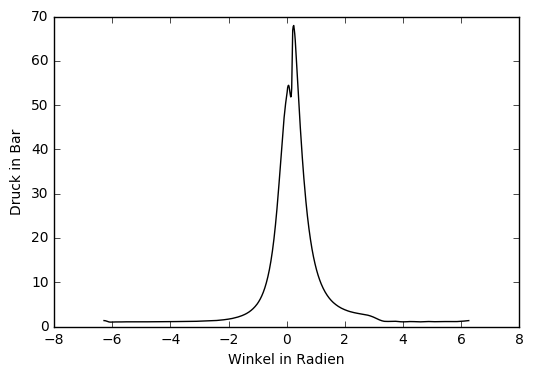

In [31]:
def convert_phi_to_rad(phi):
    
    rad=(phi/360)*math.pi*2
    return rad

def get_phis_ps(fn="2014_02_12_b_kalibriert.csv"):

    phis=[]
    ps=[]
    with open(fn,"r") as f:
        f.readline()
        f.readline()#burn the two first, they're just stuff
        for line in f.readlines():
            line=line[:-2]#remove newline
            line=line.split(",")
            phis.append(convert_phi_to_rad(float(line[0])))#oder den wert oder wie auch immer
            ps.append(float(line[1])) #ps in bar
    return phis,ps

phis,ps=get_phis_ps()
plt.plot(phis,ps,color="black")

plt.xlabel("Winkel in Radien")
plt.ylabel("Druck in Bar")
plt.savefig("DruckWinkel.jpg")
plt.show()
plt.clf()

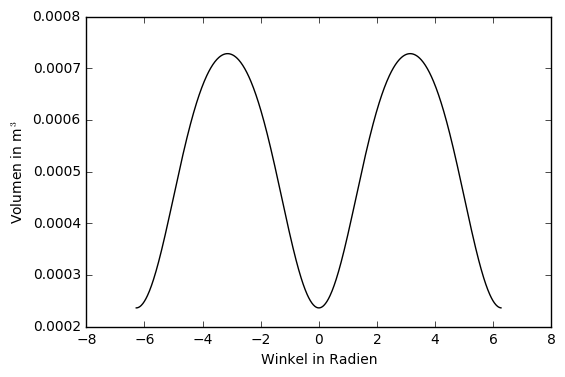

In [32]:


l=144*10**(-3)#in m pleuellänge
r = Hubmax/2#(Vmax / A*2)
lambda_s=r/l
#print(r,l,(Vmax / A*2),lambda_s)
def Hub(phi):
    #some function
    #fürs erste sollte der Sinus reichen   
    
    #dummy funktion
    #h=(Komph+1/2*Hubmax+Hubmax*math.sin(phi+3/2*math.pi))
    h = r * ( (1-math.cos(phi)) + 1/lambda_s * ( 1- (1-lambda_s**2 * math.sin(phi)**2)**0.5 ) ) 
    #jetzt richtig
    #
    h+= Komph
    
    return h


#print(phis[0],phis[100],phis[300],phis[700])

Vs=[]
for phi in phis:
    V=A*Hub(phi)
    
    Vs.append(V)
plt.plot(phis,Vs,color="black")
plt.xlabel("Winkel in Radien")
plt.ylabel("Volumen in m${^3}$")
plt.savefig("VolumenWinkel.jpg")
plt.show()

plt.clf()

0.005152997350050658 0.04580968395228828 0.00023605718001279966


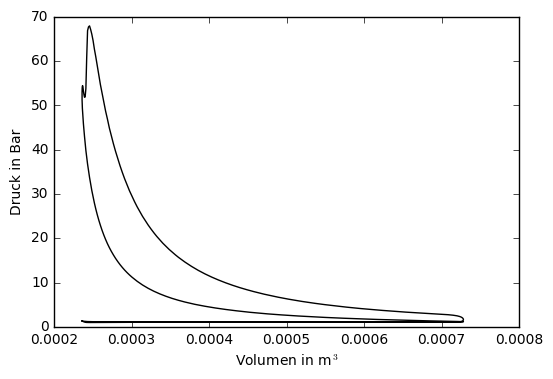

In [33]:


print(A,Hub(phi),V)

    
#print(Vs[0:100])
#Aufpassen, ich brauche entweder nur einen Ladungswechsel, oder ich muss mitteln
#unabhängig davon, habe ich
#jetzt alle Werte für p und V
#und man kann das p V diagram plotten

#dummy werte
#Vs=[4,2,2,4,1,3,4]
#ps=[2,2,1,1,8,8,2]

#falsch sortiert...
def redo(ps,Vs):
    com=[]
    c=0
    m=len(ps)
    print(m)
    while c < m:
        com.append((ps[c],Vs[c]))
        c+=1
    com.sort(key=lambda x : x[0])
    print("len com",len(com))
    ps=[]
    Vs=[]
    for x in com:
        ps.append(x[0])
        Vs.append(x[1])
    return ps,Vs

#ps,Vs=redo(ps,Vs)


#plt.xlim(0.0002,0.0008)
plt.plot(Vs,ps,color="black")

plt.xlabel("Volumen in m${^3}$")
plt.ylabel("Druck in Bar")
plt.savefig("PV.jpg")
plt.show()

plt.clf()



In [42]:

#numerische Flächeberechnung nach Cha Zhang
#EFFICIENT FEATURE EXTRACTION FOR 2D/3D OBJECTS
#IN MESH REPRESENTATION
def Teilfläche(p1,p2):
    A = 1/2 * ( - p2[0] * p1[1] + p1[0] * p2[1] )
    return A


A=0
c=0
m=len(Vs)
bartopascal=10**5
btp=bartopascal
while c < m-1:
    p1=(ps[c]*btp,Vs[c])
    p2=(ps[c+1]*btp,Vs[c+1])
    Teil_A=Teilfläche(p1,p2)
    #control printout
    #print("parts",p1,p2,Teil_A)
    A+=Teil_A
    c+=1
#p0=(ps[0],Vs[0])
#pl=(ps[-1],Vs[-1])
#ai=Teilfläche(pl,p0)
#print(ai)
#A+=ai
print("Ergebnis, Arbeit bzw. eingeschlossene Fläche:",A)
gesamt_motor=A*2*(1500/60)/1000#pro sekunde in KW
print(gesamt_motor)#pro spiel

#print(1500*A*2/1000)
#Wir haben jetzt also die Arbeit, in Nm, für einen Lastwechsel,



Ergebnis, Arbeit bzw. eingeschlossene Fläche: 377.3127928236342
18.865639641181712


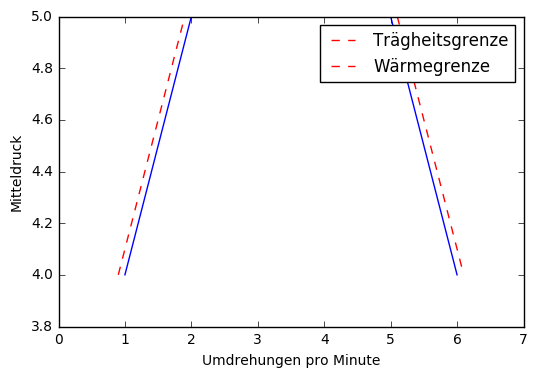

In [35]:
#Als nächsten Schritt, zur Berechnung des Motorkennfelds
#brauchen wir den Mitteldruck...

#ähm...

#Flächen und Volumina?
#As=[1,2,2,2,1]


#dummy werte
Pme=[4,5,5,5,4]

#Wir haben wahrscheinlich auch Daten zur Umdrehungsgeschwindigkeit,

Us=[1,2,4,5,6]

plt.plot(Us,Pme)
plt.xlabel("Umdrehungen pro Minute")
plt.ylabel("Mitteldruck")

#Trägheitsgrenze
Tx=[0.9,1.9]
Ty=[4,5]
plt.plot(Tx,Ty,color="red",linestyle="--",label="Trägheitsgrenze")

#Wärmegrenze
Wx=[5.1,6.1]
Wy=[5,4]
plt.plot(Wx,Wy,color="red",linestyle="--",label="Wärmegrenze")


plt.legend()

plt.show()
plt.clf()


In [36]:

#wir haben:

#M.KR in 2014_02_12_buchstabe
Mkr=1
#spalte AX

# kraftstoffverbrauch pro stunde
# Energie pro zylinder auf 2 umdrehungen
def spez_Kraftstoff(A,Mkr):
    A_neu=A/2*4*1500/60
    # Energie pro umdrehung für alle zylinder mal umdrehungen pro min / 60 s
    # das ist die energie pro sekunde die wir gewinnen


    Mkr_neu= Mkr / 3600 # kraftverbrauch pro sekunde

    spez_KR = Mkr_neu/A_neu 
    return spez_KR

# gesucht: spezifischer Kraftstoffverbrauch in g/kWh

x=spez_Kraftstoff(A,Mkr)
print(x)



0.0014724005284793879
